In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px grey solid !important;
  color: white !important;
}
</style>

In [2]:
import os
import re
import emoji
import demoji
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# processing of text
from preprocessing import Preprocessing
from text_for_plot_functions import extract_emoticons, create_dataframe_emoji_comparison, clean_text_emoji

#plot
from plot_functions import plot_word_cloud, count_plot_words
from stopwords import stopwords
from model_functions import split_train_val_test


In [3]:
# setting display
pd.options.mode.chained_assignment = None
pd.options.display.max_colwidth = 300
pd.set_option("display.colheader_justify","left")
%matplotlib inline

## load and download only for the first time
# demoji.download_codes()

In [4]:
data = Preprocessing()
data.load_data()

In [5]:
data.conected_data['Kind of offensive language'].value_counts().to_frame()\
    .rename_axis('Response', axis=1).style.set_properties(
        **{'color': 'white !important',
           'border': '1px grey solid !important',
           'text-align': 'center'}
        ).set_table_styles([{
            'selector': 'th',
            'props': [('border', '1px grey solid !important')]
        }])

Response,Kind of offensive language
0,10056
1,3255
2,78


In [6]:
data.remove_quoting_comments()
conected_data = pd.concat([data.x_raw, data.y], axis=1)

In [7]:
# prepare to function to extract emoji to dict
emoji_for_response_0 = []
emoji_for_response_1 = []
emoji_for_response_2 = []

conected_data['Emoticons'], conected_data['Number of emoticons in comment'] = \
    zip(*conected_data[['Comment', 'Kind of offensive language']].apply(\
                                       extract_emoticons, axis=1,
                                       args=(emoji_for_response_0,
                                            emoji_for_response_1,
                                            emoji_for_response_2)))

dict_count_emoji_0 = dict((i, emoji_for_response_0.count(i)) for i in
                          emoji_for_response_0)
dict_count_emoji_1 = dict((i, emoji_for_response_1.count(i)) for i in
                          emoji_for_response_1)
dict_count_emoji_2 = dict((i, emoji_for_response_2.count(i)) for i in
                          emoji_for_response_2)

In [8]:
# count how many times emoji occurs in dataset
plot_emoticons = create_dataframe_emoji_comparison(dict_count_emoji_0,
                                                   dict_count_emoji_1,
                                                   dict_count_emoji_2,
                                                   ['Response_0', 'Response_1'])
plot_emoticons

,Response_0,Response_1,Response_2
emoji,,,
😁,850.0,67.0,3.0
:),743.0,42.0,NaN
😂,626.0,33.0,NaN
xd,199.0,6.0,NaN
😀,167.0,9.0,NaN
😉,161.0,NaN,NaN
;-),127.0,1.0,NaN
:d,93.0,3.0,NaN
;),88.0,10.0,NaN


In [9]:
# emoji in comments with punishable threats 
conected_data[(conected_data['Kind of offensive language'] == 2) 
              & (conected_data['Number of emoticons in comment']>0)]

,Comment,Kind of offensive language,Emoticons,Number of emoticons in comment
1472,"@anonymized_account @anonymized_account Jaka tv, tacy idole😁😁😁 A tak trochę poważniej, to za tę napaść na dziewczynkę to tylko w ten pedalski ryj.",2,😁,3
1949,"@anonymized_account Zamknij niemiecki ryj,siedź w tej Brukseli i nie wracaj złodzieju!😬😬😬",2,😬,3


In [10]:
# prepare data to present result
data.demojize()
data.clean_text()

conected_data = pd.concat([data.x_raw, data.y], axis=1)

# remove emoji(as text)
conected_data['Comment'] = clean_text_emoji(conected_data['Comment'])

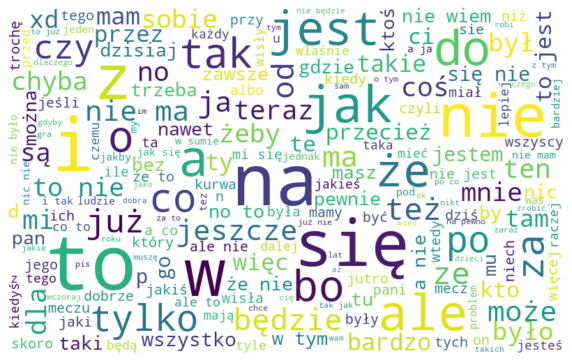

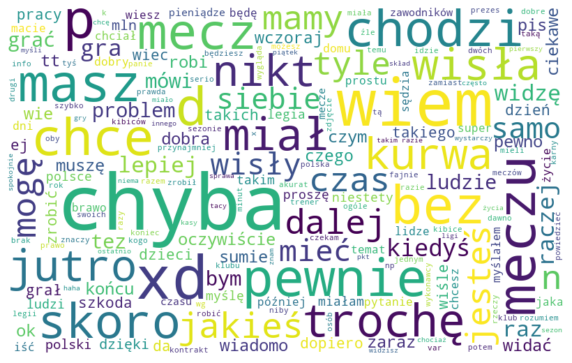

In [11]:
# visualizing which of the word is most commonly used in normal speech
kind_0 = conected_data[conected_data['Kind of offensive language']==0]
plot_word_cloud(kind_0)
plot_word_cloud(kind_0, stopwords=stopwords)

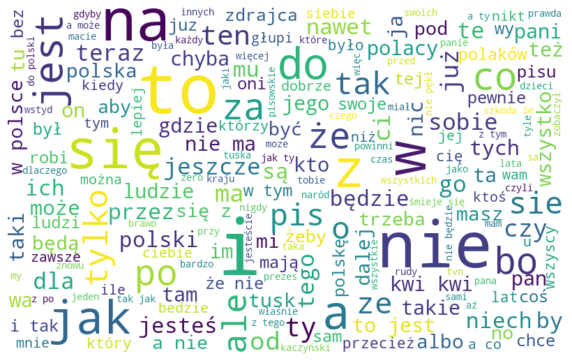

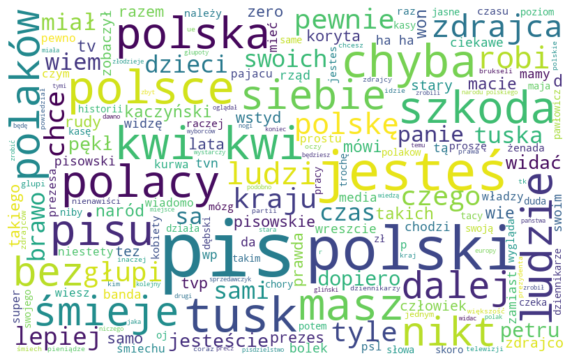

In [12]:
# visualizing which of the word is most commonly used in hate speech
kind_1 = conected_data[conected_data['Kind of offensive language']==1]
plot_word_cloud(kind_1)
plot_word_cloud(kind_1, stopwords=stopwords)

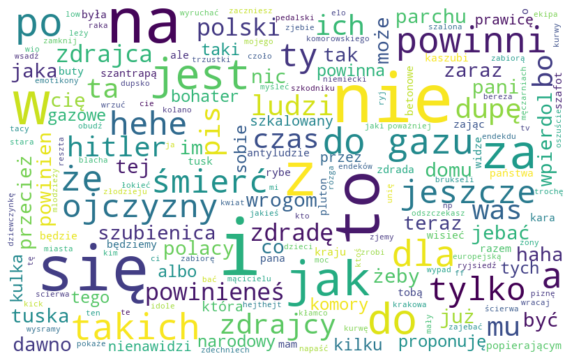

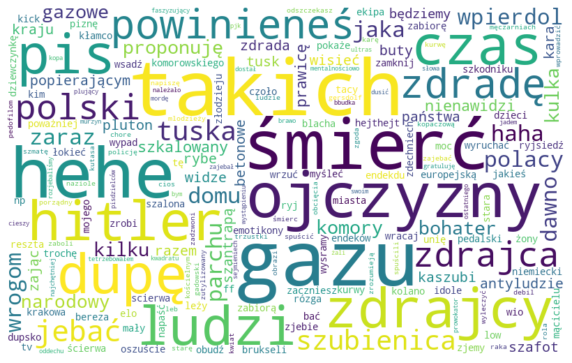

In [13]:
# visualizing which of the word is most commonly used in punishable threats 
kind_2 = conected_data[conected_data['Kind of offensive language']==2]
plot_word_cloud(kind_2)
plot_word_cloud(kind_2, stopwords=stopwords)

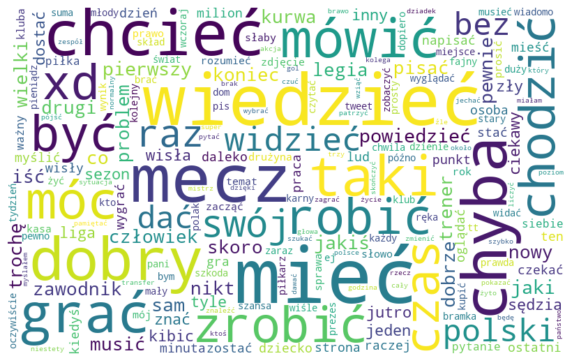

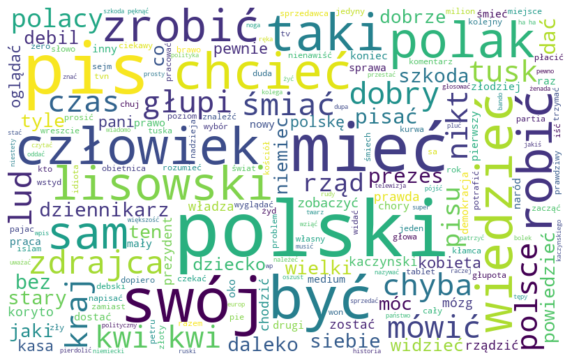

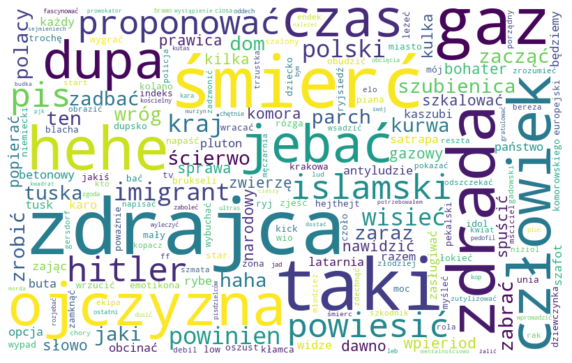

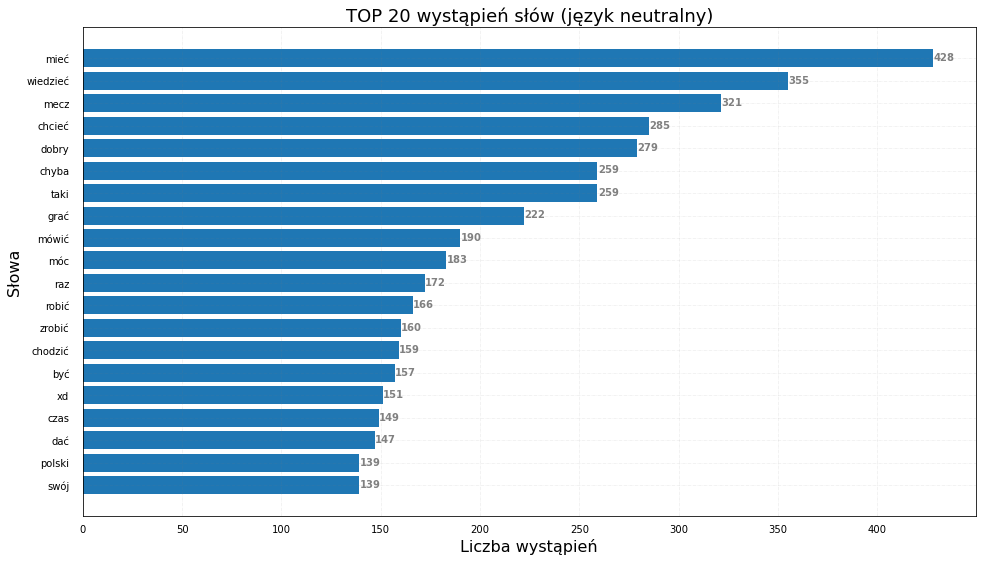

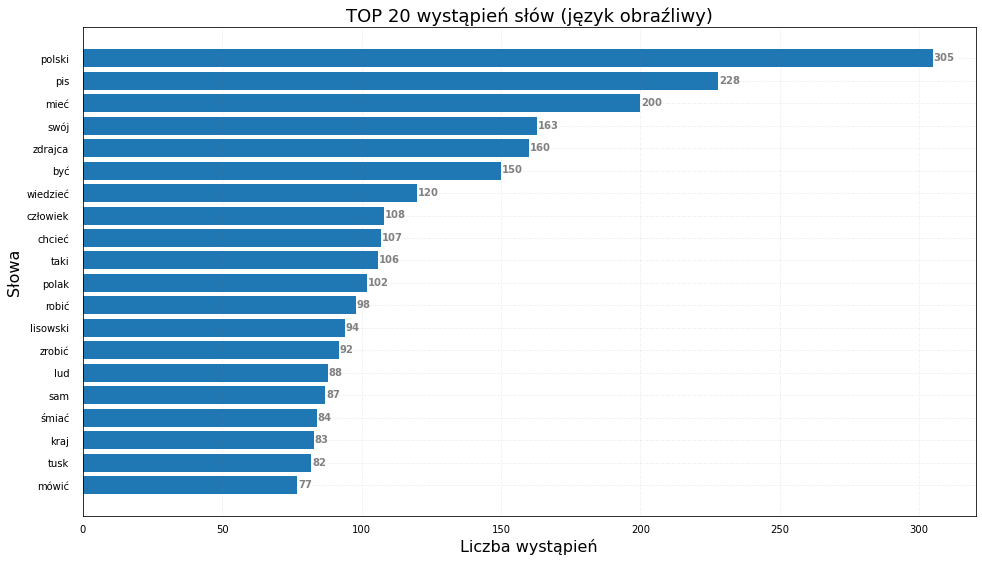

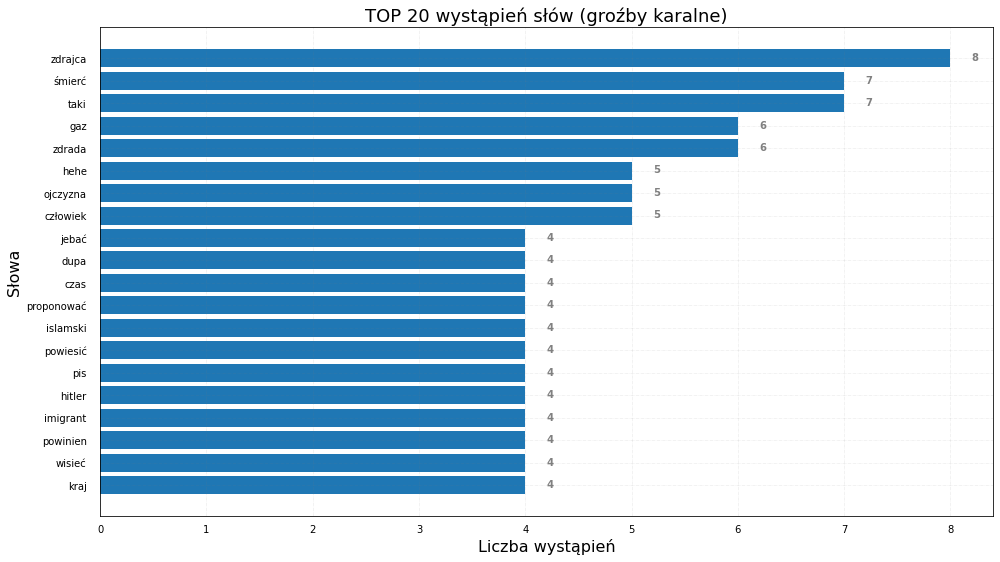

In [14]:
# present result for cleaned text
conected_data = pd.read_csv('cleaned_data.csv')
conected_data['Comment'] = clean_text_emoji(conected_data['Comment'])
kind_0 = conected_data[conected_data['Kind of offensive language']==0]
kind_1 = conected_data[conected_data['Kind of offensive language']==1]
kind_2 = conected_data[conected_data['Kind of offensive language']==2]
plot_word_cloud(kind_0)
plot_word_cloud(kind_1)
plot_word_cloud(kind_2)
count_plot_words(kind_0, 'język neutralny')
count_plot_words(kind_1, 'język obraźliwy')
count_plot_words(kind_2, 'groźby karalne')

# Model

In [15]:
data = split_train_val_test(visualization=True)

In [16]:
data

,Comment,Kind of offensive language,split
0,strefa kibic radio akadera zapraszać,0,train
1,ważny ważny łamanie konstytucja koniec kropka robić dobry rzecz,0,train
2,wrażenie kiko mieć możliwość zmiana wałecki ulubieniec kibic wielki popart kiko zarząd,0,train
3,księciunio inaczej miałabym pobudka codziennie musieć iścić kompromis,0,train
4,zajmować krocze,0,train
...,...,...,...
12650,ciekawy śmieć zawisnąć jajo latarnia belweder,2,test
12651,na_przykład wybuchać dupsko krakowa,2,test
12652,zdechnąć męczarnia rak trzustka,2,test
12653,hehe gaz hehe marzec,2,test


In [17]:
# present equal proportion group after split
percent = data.groupby(['Kind of offensive language', 'split']).count()
percent.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

Comment  
Kind of offensive language split           
0                          test   20.000000
                           train  60.000000
                           val    20.000000
1                          test   20.038107
                           train  59.987298
                           val    19.974595
2                          test   21.052632
                           train  59.210526
                           val    19.736842